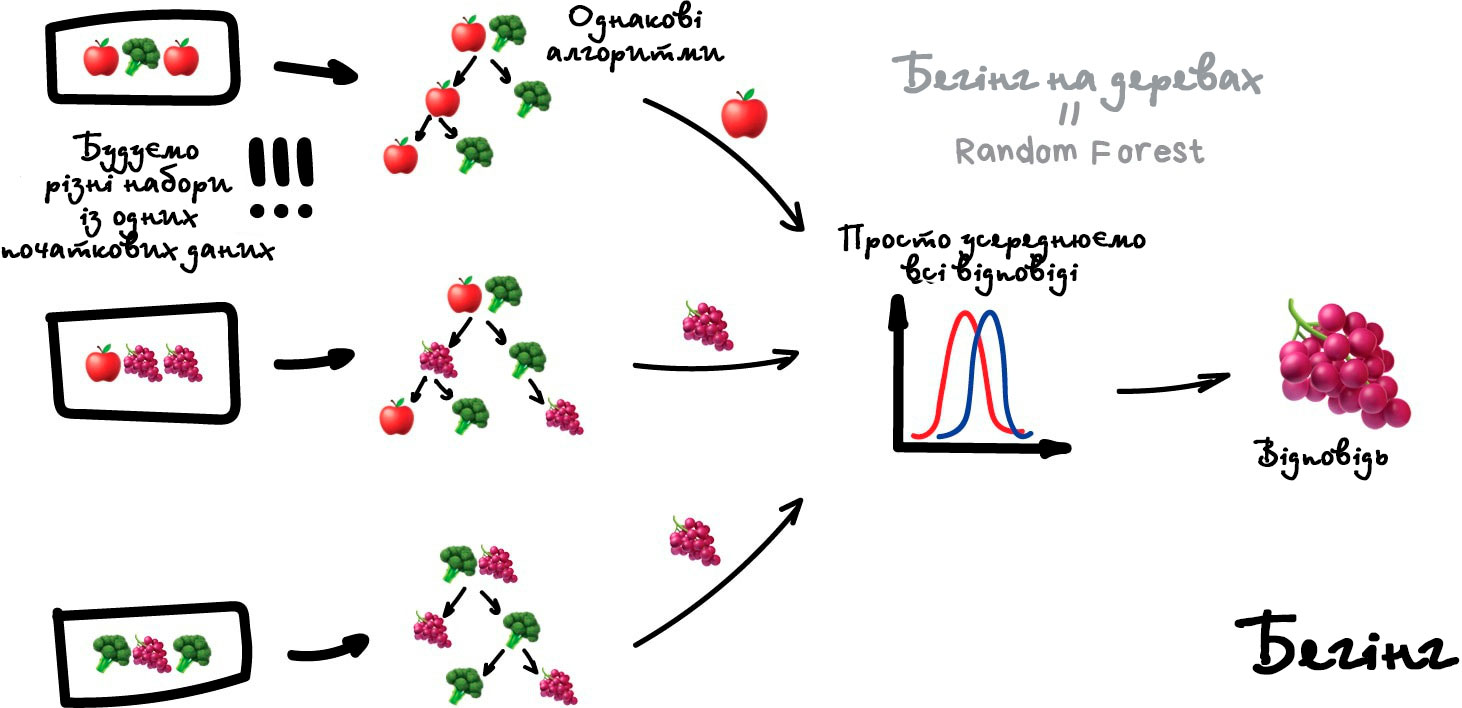

**<h1>Random Forest: теорія та пакети</h1>**

<h2>Авторки: Сидорчук Ярослава та Балагура Софія</h2>

**Мета:** метою проєкту є вивчення та практичне застосування алгоритму **Random Forest** в машинному навчанні з використанням програмування на мові Python для створення прикладних математичних моделей

Import

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Підключаємо датасет, дані з якого можуть використовуватися для прогнозування захворювань серця.

*   age - вік людини
*   sex - стать
*   BP - blood pressure, кров'яний тиск
*   cholestrol - рівень холестерину
*   heart disease - наявність хвороби серця


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/soumya-mishra/Heart-Disease_DT/main/heart_v2.csv")
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


Розміщення змінної функції в **x** і цільової змінної в значення **y**

In [ ]:
x = df.drop('heart disease', axis=1)
y = df['heart disease']

Розділяємо датасет на тестову та тренувальну вибірки. Функція **train_test_split()** із бібліотеки **scikit-learn** *(безкоштовна програмна бібліотека машинного навчання для мови програмування Python, яка надає функціональність для створення та тренування різноманітних алгоритмів класифікації, регресії та кластеризації)* використовується для поділу даних на навчальні та тестові набори.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape

((189, 4), (81, 4))

Імпортуємо **RandomForestClassifier** та підберемо дані.
Метод **fit()** навчає модель на вхідних даних, регулюючи параметри дерев рішень, щоб мінімізувати похибку між прогнозованими та фактичними значеннями.

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
y_pred = classifier_rf.predict(x_test)

Оцінимо Random Forest модель. Для цього використаємо показник **Out Of Bag (OOB)**. Ми отримаємо кількість правильно передбачених даних у зразках OOB, взятих для перевірки

In [ ]:
classifier_rf.oob_score_

0.6243386243386243

Також знайдемо точність прогнозу моделі. Ми порівнюємо прогноз з фактичними значеннями в тестовому наборі та визначаємо, наскільки точним він є

In [ ]:
accuracy_score(y_test, y_pred)

0.7037037037037037

Налаштуємо гіперпараметри для Random Forest за допомогою **GridSearchCV** та підберемо дані

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
%time
grid_search.fit(x_train, y_train)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.6983599290780141

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

З налаштування гіперпараметрів ми можемо отримати найкращу оцінку. Найкращий набір визначених параметрів:  **max_depth = 3**,  **min_samples_leaf = 5**, **n_estimators = 10**

Перейдемо до візуалізації

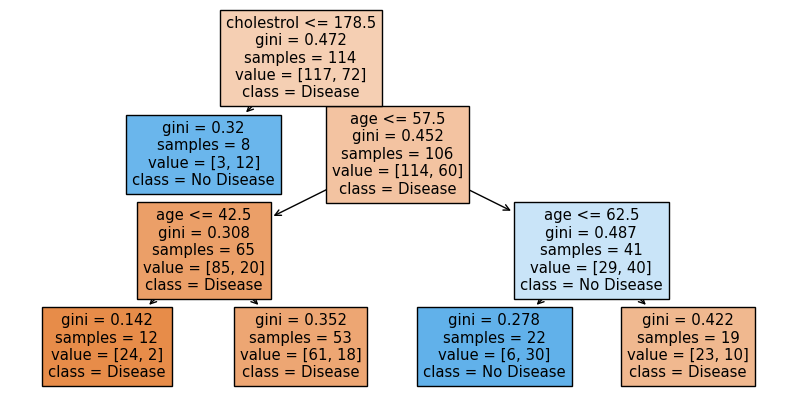

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

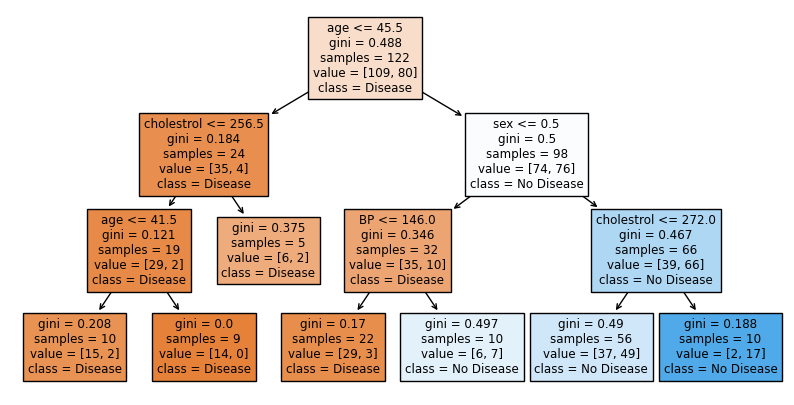

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(rf_best.estimators_[7], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

Дерева, створені оцінювачами (estimators_[5] і estimators_[7]), різні. Таким чином, можна сказати, що кожне дерево не залежить від іншого.

Відсортуємо дані за важливістю ознак:

In [ ]:
rf_best.feature_importances_

array([0.36874775, 0.26761339, 0.13663473, 0.22700413])

In [ ]:
imp_df = pd.DataFrame({
    "Ознака": x_train.columns,
    "Важливість": rf_best.feature_importances_
})
imp_df.sort_values(by="Важливість", ascending=False)

,Ознака,Важливість
0,age,0.368748
1,sex,0.267613
3,cholestrol,0.227004
2,BP,0.136635


Створимо новий комбінований датасет з нашими даними та прогнозованими значеннями

In [ ]:
y_pred = rf_best.predict(x_test)
combined_data = np.concatenate((x_test, y_pred.reshape(-1, 1)), axis=1)
combined_df = pd.DataFrame(combined_data, columns=list(x_test.columns) + ['y_pred'])
combined_df

,age,sex,BP,cholestrol,y_pred
0,56,1,130,283,1
1,43,1,150,247,0
2,59,1,160,273,1
3,64,1,125,309,1
4,50,0,120,244,0
...,...,...,...,...,...
76,55,0,180,327,0
77,51,1,94,227,0
78,34,1,118,182,0
79,58,1,112,230,1


Створимо новий датасет, в який ми вноситимемо дані про пацієнта і навчена модель зможе на основі цих даних визначити, чи здоровий пацієнт (Healthy), чи ні (Disease!).

In [ ]:
df = pd.DataFrame([{
    'age': 50,
    'sex': 1,
    'BP': 200,
    'cholestrol': 261
}])
prediction = rf_best.predict(df)

print("Disease!") if prediction[0] == 1 else print("Healthy")


Healthy


Знайдемо точність нових прогнозних значень по відношенню до фактичних

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6296296296296297


**Список використаних джерел:**
1. Датасет - https://raw.githubusercontent.com/soumya-mishra/Heart-Disease_DT/main/heart_v2.csv
2. Random Forest Algorithms - https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
3. What is Out of Bag (OOB) score in Random Forest? - https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710
4. Random Forest Classification with Scikit-Learn | DataCamp - https://www.datacamp.com/tutorial/random-forests-classifier-python
5. Машинне навчання простими словами. Частина 2 - http://mmf.com.ua/ar/1743